# An EDA with python and applying Logistic Regrassion 

Here we will be:
1. Use Titanic dataset (from KAggle)
2. Use python to apply logisitc regrassion
3. Predict a classification - servived or Deceased

Note: We will be using a semi cleaned dataset version of this dataset, there will be additional cleaning required if actual dataset, for Kaggle, is used.

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Lets explore the data 

In [2]:
titanicDF = pd.read_csv("titanic_train.txt")

titanicDF.head()
# SibSp = Sibling Spause
# Parch = Parent Child

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Lets begin EDA, and explore null values


### Use seaborn's heatmap functionality to see where are the missing values 

In [3]:
titanicDF.isnull()

# 'True' values says its null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


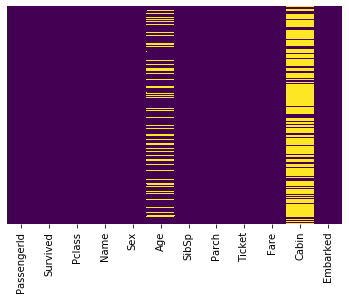

In [4]:
sns.heatmap(titanicDF.isnull(), yticklabels=False, cbar=False, cmap="viridis")

# The yellow line shows NaN values
# Y-Axis is hidden with 'yticklabels=False'. If true it will show row index

When you observe this heatmap you will notice
1. Roughly 20% of  Age Data is missing
2. There are many NaN values in Cabin columns

Regarding Age columns, missing values % is likely small, we can handle this using Mean, median, average etc. we will see.
Now Cabin column, we will probably drop it later of change to another feature like "Cabin Knows - 0 or 1".

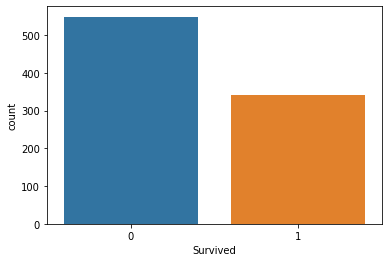

In [5]:
# Use sns count plot to check count of survived or deceased

sns.countplot(titanicDF['Survived'])

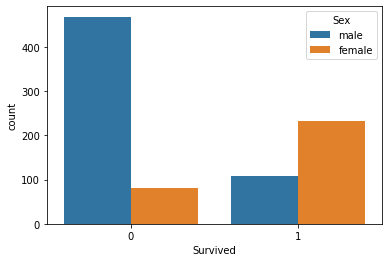

In [6]:
# Distinguish gender in above visualization

sns.countplot(titanicDF['Survived'], hue=titanicDF['Sex'])

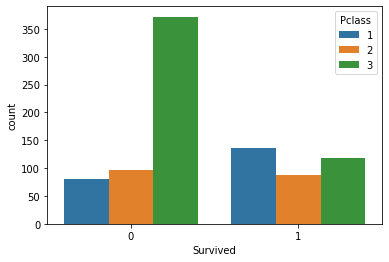

In [7]:
# Add pacenger class in above visualization

sns.countplot(titanicDF['Survived'], hue=titanicDF['Pclass'])

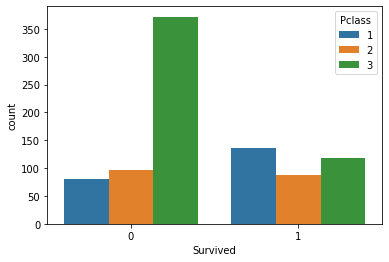

In [8]:
# Above count plot can be written as well

sns.countplot(x='Survived', data=titanicDF, hue='Pclass')

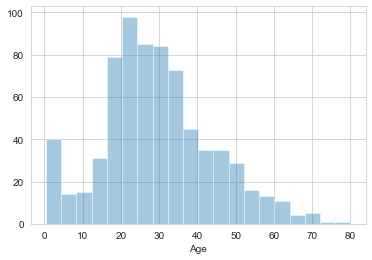

In [9]:
# Use distplot to find out distribution of Age
sns.set_style('whitegrid')
sns.distplot(titanicDF['Age'], kde=False)

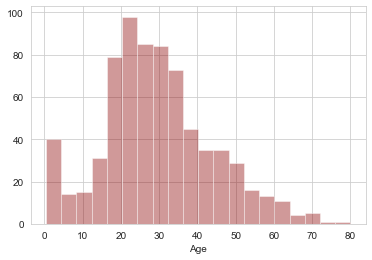

In [10]:
# Remember we had NaN values in age, lets drop them using dropna()
sns.distplot(titanicDF['Age'].dropna(), kde=False, color='darkred')

In [11]:
# Lets check count of Shibling and Spouse

#sns.countplot(titanicDF['SibSp'], kde=False)

# Failing because Sibling and spause doesn't having distribution. Lets try after removing kde

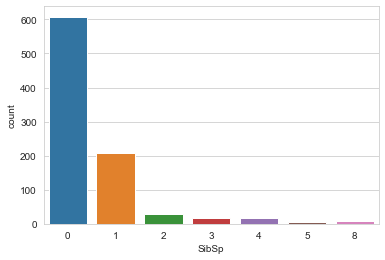

In [12]:
sns.countplot(titanicDF['SibSp'])

### Data Cleaning 

Considering 'Age' columns here. Instead of droping those row having Null value we should fill in those values. But how and what!!

There are following ways, we can fill missign values here:
1. Fill mean age (imputation)
2. We can put average as well.

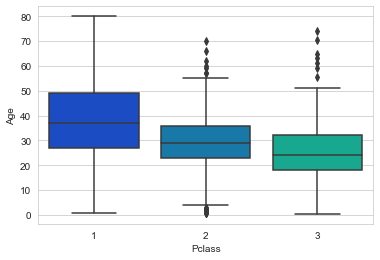

In [13]:
# Lets cehck using box-plot and observe the distribution. Based on that we can decide weather Mean, media or average can be used.
# one other thing is, Passenger class and Age is having some correlation seems. Lets check that!!

sns.boxplot(x='Pclass', y='Age', data=titanicDF, palette='winter') # Other palette parameters are 'summer', 'spring' etc :P No that true :)

## Observation:
# Average age of Passenger class 1 is ~37 years
# Average age of Passenger class 2 is ~29 years
# Average age of Passenger class 3 is ~24 years

# In general, Passengers of higer class (here P1) tend to be older, and that make sense as well. 
# So, verdict here is - WE WILL USE AVERAGE AGE VALUES TO IMPUTE BASED ON PASSENGER CLASS for AGE COLUMN

In [14]:
# As we decided to use pclass to derive average. we can acheive that using following function

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    
# this function has created    

In [15]:
# Lets apply that function!

titanicDF['Age'] = titanicDF[['Age','Pclass']].apply(impute_age, axis=1)

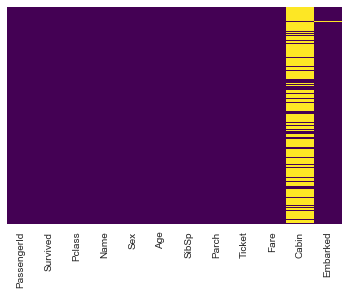

In [16]:
# Time to check the result now

sns.heatmap(titanicDF.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Note, there is yellow lines in age, i.e. no null values in age columns

In [17]:
# Now coming to Cabin and Embark as there are null values. At this stage we are going to drop this column, rather than applying
# feature engineering and handling null values

titanicDF.drop('Cabin', axis=1, inplace=True) # axis : {0 or 'index', 1 or 'columns'}, default 0

In [18]:
titanicDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


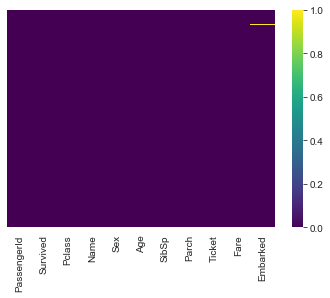

In [19]:
sns.heatmap(titanicDF.isnull(), yticklabels=False, cmap='viridis')

In [20]:
titanicDF.dropna(inplace=True)

In [21]:
titanicDF.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False


### Converting categorical value to integer/numeric/floats

We would need to convert categorical features to dummy variables using pandas. Oterwise out machine learning algorithm won't be able to direclty take in those features as input.

In [22]:
titanicDF.head()

## So, following columns hold categorical values 
# Sex
# Embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
# Lets convert Embarked columns from categorical feature to Numeric 
pd.get_dummies(titanicDF['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [24]:
## What did it do!!! 

# Not sure, but seems there were 3 distinct values in columns 'Embarked' that why get_dummies returns in 2 columns. lets see that

titanicDF.Embarked.unique()

# Bingo!! So we were correct :) # distinct values were 'C', 'Q' and 'S' and these were the column names.

array(['S', 'C', 'Q'], dtype=object)

In [25]:
# Get back to get_dummies now. an dtry to understand more.

# Here the column 'C' can we drived from columns Q and S by applying following formula

# When Q and S is same, C is 1. Otherwise 0.

# MEANING, WE CAN DROP COLUMN C here.

pd.get_dummies(titanicDF['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
## So now we understood. Lets convert categorical values in to dummy/inidcative values

embark = pd.get_dummies(titanicDF['Embarked'], drop_first=True)
sex = pd.get_dummies(titanicDF['Sex'], drop_first=True)


In [27]:
# Also drop all columns which are not required

titanicDF.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [28]:
titanicDF.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [29]:
# now add indicative columns

titanicDF = pd.concat([titanicDF, sex, embark], axis=1)

In [39]:
titanicDF.head()

# Note - Here only male is show, because based on value, Female can be derived

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Building a Logistic Regression model

Lets start by splitting our data in to training set and test set

#### Train Test Split

In [31]:
titanicDF.drop('Survived', axis=1).head() # This is my complete training data set

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [32]:
titanicDF['Survived'].head() # This is my output dataset

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(titanicDF.drop('Survived', axis=1),
                                                   titanicDF['Survived'], test_size=0.30,
                                                   random_state=101)
# Syntax of train_test_split - train_test_split(input, output, % of test)

#### Training and pridiction

In [35]:
from sklearn.linear_model import LogisticRegression

In [40]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, Y_train)

C:\Users\Barun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
prediction = log_reg_model.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix

In [47]:
accuracy = confusion_matrix(Y_test, prediction)

In [49]:
accuracy

array([[148,  15],
       [ 39,  65]], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy =accuracy_score(Y_test, prediction)
accuracy

# MY FIRST EVER PRIDICTION :)

0.797752808988764

In [54]:
prediction

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)